In [1]:
instroom2016_2019 <- read.table("1e_asielaanvraag_instroom_2016_2019.csv", header = TRUE, sep = ";")

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
names(instroom2016_2019)

[1] "Aantal.zaken"                             
 [2] "Doorlooptijd.in.dagen"                    
 [3] "Jaar..instroomdatum."                     
 [4] "Jaar..standdatum."                        
 [5] "Maandnummer..instroomdatum."              
 [6] "Weeknummer..instroomdatum."               
 [7] "Jaar..uitstroomdatum."                    
 [8] "Maandnummer..uitstroomdatum."             
 [9] "Weeknummer..uitstroomdatum."              
[10] "Zaak.definitief.indicatie..zaak."         
[11] "Eerste.Asiel.aanvraag.indicatie..zaak."   
[12] "Eerste.Regulier.aanvraag.indicatie..zaak."
[13] "Binnen.buiten.wettelijke.termijn..zaak."  
[14] "Werksoort..zaak."                         
[15] "Binnen.buiten.streeftermijn..zaak."       
[16] "Gevraagde.kwalificatie..zaak."            
[17] "Geleverde.kwalificatie..zaak."            
[18] "Afdoeningswijze..zaak.definitief."        
[19] "Behandelresultaat..zaak.definitief."      
[20] "Nationaliteit..subject.instroomdatum."

In [4]:
names(instroom2016_2019) <- c("Aantalzaken", "Doorlooptijdindagen", "Jaarinstroomdatum", "Jaarstanddatum", "Maandnummerinstroomdatum", "Weeknummerinstroomdatum", "Jaaruitstroomdatum", "Maandnummeruitstroomdatum", "Weeknummeruitstroomdatum", "Zaakdefinitiefindicatiezaak", "EersteAsielaanvraagindicatiezaak", "EersteRegulieraanvraagindicatiezaak", "Binnenbuitenwettelijketermijnzaak", "Werksoortzaak", "Binnenbuitenstreeftermijnzaak", "Gevraagdekwalificatiezaak", "Geleverdekwalificatiezaak", "Afdoeningswijzezaakdefinitief", "Behandelresultaatzaakdefinitief", "Nationaliteitsubjectinstroomdatum")

In [5]:
str(instroom2016_2019) 

'data.frame':	37708 obs. of  20 variables:
 $ Aantalzaken                        : int  4 6 1 173 2 6 3 7 3 10 ...
 $ Doorlooptijdindagen                : num  172 522 105 3.66 146 ...
 $ Jaarinstroomdatum                  : int  2019 2019 2019 2016 2016 2016 2018 2018 2018 2018 ...
 $ Jaarstanddatum                     : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ Maandnummerinstroomdatum           : int  10 8 4 11 11 12 2 3 2 2 ...
 $ Weeknummerinstroomdatum            : int  40 34 18 46 47 50 6 10 6 9 ...
 $ Jaaruitstroomdatum                 : int  2019 2019 2019 2016 2017 2017 2018 2018 2018 2018 ...
 $ Maandnummeruitstroomdatum          : int  11 11 8 11 2 2 10 3 4 3 ...
 $ Weeknummeruitstroomdatum           : int  46 47 33 47 6 8 40 12 14 11 ...
 $ Zaakdefinitiefindicatiezaak        : Factor w/ 2 levels "J","N": 1 1 1 1 1 1 1 1 1 1 ...
 $ EersteAsielaanvraagindicatiezaak   : Factor w/ 1 level "J": 1 1 1 1 1 1 1 1 1 1 ...
 $ EersteRegulieraanvraagindicatiezaak: 

In [6]:
instroom2016_2019$Jaarinstroomdatum <- as.factor(instroom2016_2019$Jaarinstroomdatum)

In [7]:
instroom2016_2019$Maandnummerinstroomdatum <- as.factor(instroom2016_2019$Maandnummerinstroomdatum)

In [8]:
instroom2016_2019$Weeknummerinstroomdatum <- as.factor(instroom2016_2019$Weeknummerinstroomdatum)

In [9]:
str(instroom2016_2019)

'data.frame':	37708 obs. of  20 variables:
 $ Aantalzaken                        : int  4 6 1 173 2 6 3 7 3 10 ...
 $ Doorlooptijdindagen                : num  172 522 105 3.66 146 ...
 $ Jaarinstroomdatum                  : Factor w/ 4 levels "2016","2017",..: 4 4 4 1 1 1 3 3 3 3 ...
 $ Jaarstanddatum                     : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ Maandnummerinstroomdatum           : Factor w/ 12 levels "1","2","3","4",..: 10 8 4 11 11 12 2 3 2 2 ...
 $ Weeknummerinstroomdatum            : Factor w/ 53 levels "1","2","3","4",..: 40 34 18 46 47 50 6 10 6 9 ...
 $ Jaaruitstroomdatum                 : int  2019 2019 2019 2016 2017 2017 2018 2018 2018 2018 ...
 $ Maandnummeruitstroomdatum          : int  11 11 8 11 2 2 10 3 4 3 ...
 $ Weeknummeruitstroomdatum           : int  46 47 33 47 6 8 40 12 14 11 ...
 $ Zaakdefinitiefindicatiezaak        : Factor w/ 2 levels "J","N": 1 1 1 1 1 1 1 1 1 1 ...
 $ EersteAsielaanvraagindicatiezaak   : Factor w/ 1 lev

In [10]:
DefInstroom2016_2019 <- filter(instroom2016_2019, Zaakdefinitiefindicatiezaak == "J")

In [11]:
unique(DefInstroom2016_2019$Afdoeningswijzezaakdefinitief)

[1] Niet in behandeling nemen  Kennelijk ongegrond       
[3] Inwilliging                Intrekking door klant     
[5] Niet ontvankelijk          Ongegrond                 
[7] Buiten behandeling stellen Overlijden                
[9] Onbekend                  
9 Levels: Buiten behandeling stellen Intrekking door klant ... Overlijden

In [15]:
str(DefInstroom2016_2019)

'data.frame':	34403 obs. of  20 variables:
 $ Aantalzaken                        : int  4 6 1 173 2 6 3 7 3 10 ...
 $ Doorlooptijdindagen                : num  172 522 105 3.66 146 ...
 $ Jaarinstroomdatum                  : Factor w/ 4 levels "2016","2017",..: 4 4 4 1 1 1 3 3 3 3 ...
 $ Jaarstanddatum                     : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ Maandnummerinstroomdatum           : Factor w/ 12 levels "1","2","3","4",..: 10 8 4 11 11 12 2 3 2 2 ...
 $ Weeknummerinstroomdatum            : Factor w/ 53 levels "1","2","3","4",..: 40 34 18 46 47 50 6 10 6 9 ...
 $ Jaaruitstroomdatum                 : int  2019 2019 2019 2016 2017 2017 2018 2018 2018 2018 ...
 $ Maandnummeruitstroomdatum          : int  11 11 8 11 2 2 10 3 4 3 ...
 $ Weeknummeruitstroomdatum           : int  46 47 33 47 6 8 40 12 14 11 ...
 $ Zaakdefinitiefindicatiezaak        : Factor w/ 1 level "J": 1 1 1 1 1 1 1 1 1 1 ...
 $ EersteAsielaanvraagindicatiezaak   : Factor w/ 1 level "J

In [14]:
DefInstroom2016_2019$Zaakdefinitiefindicatiezaak <- droplevels(DefInstroom2016_2019$Zaakdefinitiefindicatiezaak)

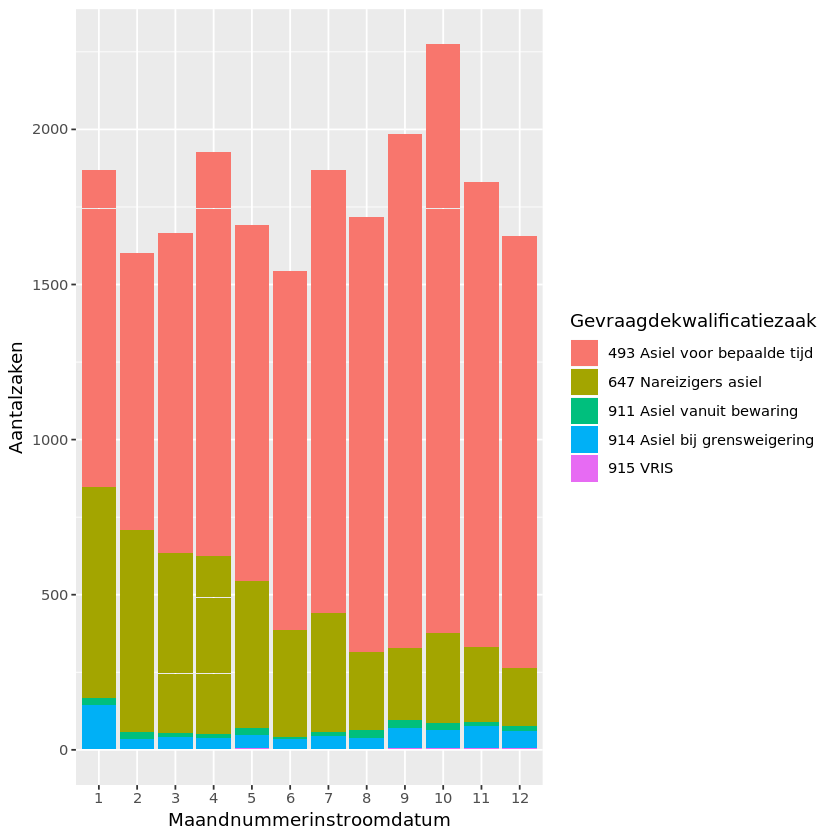

In [17]:
ggplot(filter(instroom2016_2019, Jaarinstroomdatum=="2018"), aes(x=Maandnummerinstroomdatum, y = Aantalzaken, fill= Gevraagdekwalificatiezaak)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col() 
    #scale_y_log10() +
    #ylab("proportion") +
    # facet_wrap(~Jaarinstroomdatum) 
    # theme(axis.text.x=element_text(angle=90))

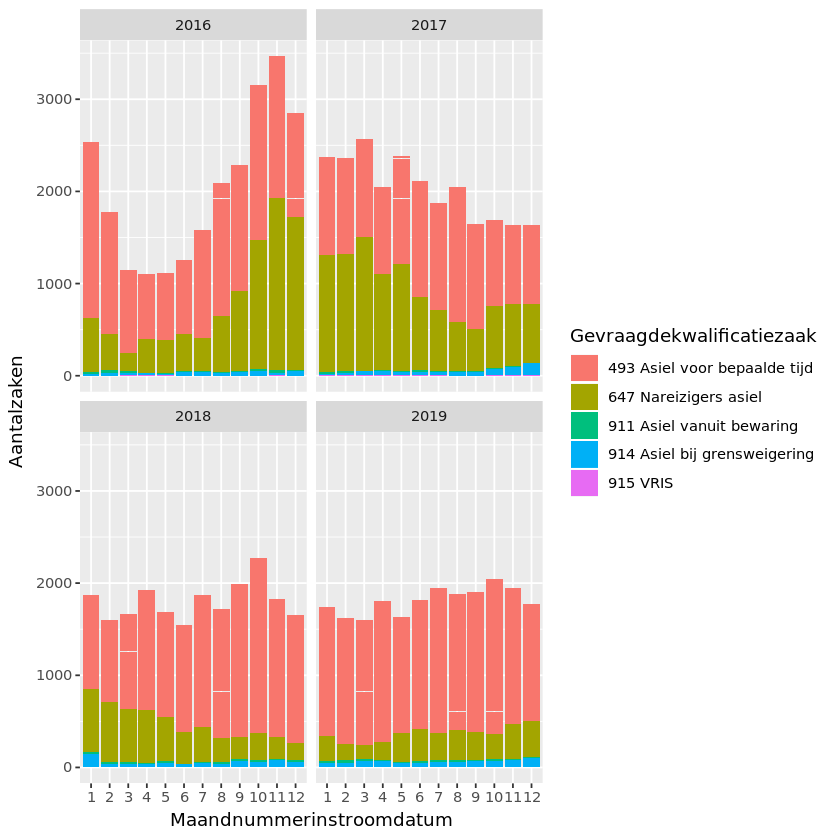

In [16]:
ggplot(instroom2016_2019, aes(x=Maandnummerinstroomdatum, y = Aantalzaken, fill= Gevraagdekwalificatiezaak)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col() +
    #scale_y_log10() +
    #ylab("proportion") +
    facet_wrap(~Jaarinstroomdatum) 
    # theme(axis.text.x=element_text(angle=90))


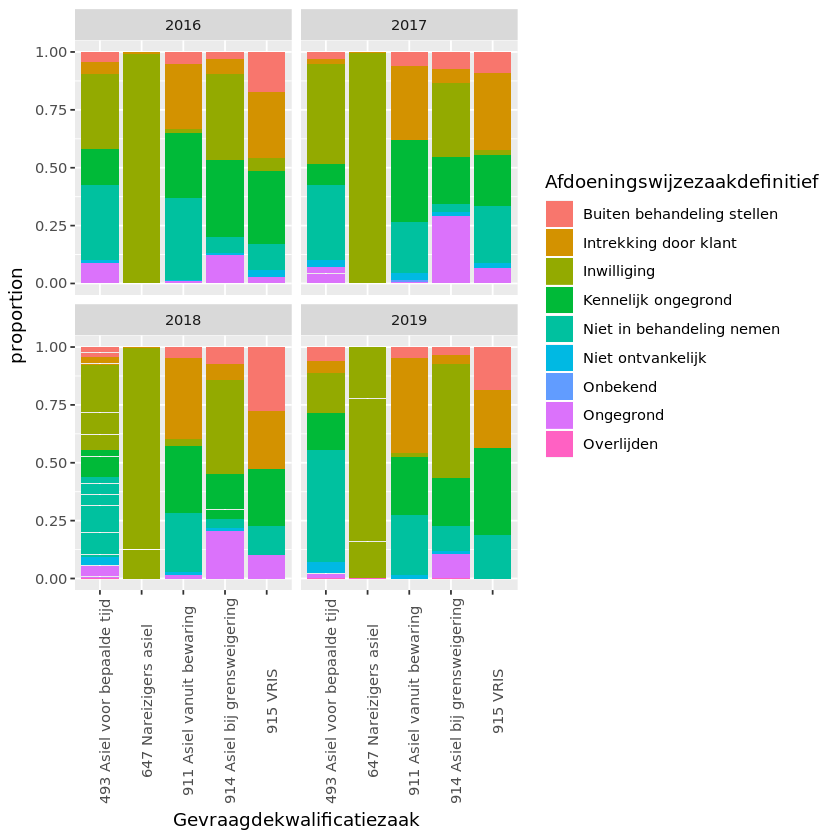

In [33]:
ggplot(DefInstroom2016_2019, aes(x=Gevraagdekwalificatiezaak, y = Aantalzaken, fill= Afdoeningswijzezaakdefinitief)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col(position = "fill") +
    #scale_y_log10() +
    ylab("proportion") +
    facet_wrap(~Jaarinstroomdatum) +
    theme(axis.text.x=element_text(angle=90))

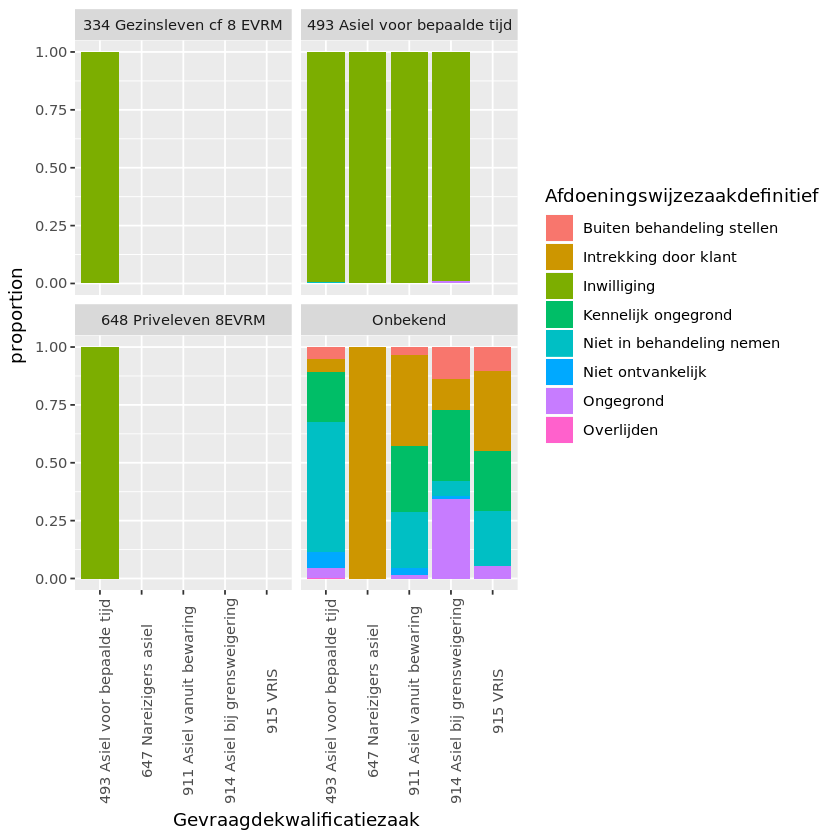

In [18]:
ggplot(DefInstroom2018, aes(x=Gevraagdekwalificatiezaak, y = Aantalzaken, fill= Afdoeningswijzezaakdefinitief)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col(position = "fill") +
    ylab("proportion") +
    facet_wrap(~Geleverdekwalificatiezaak) +
    theme(axis.text.x=element_text(angle=90))
